# NLP for opportunities

This notebook is intended to analyze the data of the monthly webinars in the AESCULAP ACADEMY FOUNDATION MEXICO. This kind of data is totally unstructured and simple natural language from open responses at surveys. The main goal is to extract the most important words and phrases from the data and to create a word cloud to visualize the results.

Author : Axel Daniel Malváez Flores  
Date : July 13th, 2023  
Version : 1.0.0  

In [32]:
# Needed dependencies for the NLP
#!pip install -U pip setuptools wheel
#!pip install spacy
#!python -m spacy download en_core_web_sm
#!python -m spacy download es_core_news_sm

In [33]:
# Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style('darkgrid')

## Reading Data

In order to read all the files with only having the extension ".xlsx", we just simply list all the files in the directory and then filter them by the extension.

In [34]:
super_path = '../Survey-Results'
file_names = os.listdir(super_path)

data_from_files = []
names = []

for file in file_names:
    if file.endswith('.xlsx'):
        names.append(file)
        data = pd.read_excel('../Survey-Results/' + file, sheet_name='NLP')
        data_from_files.append(data)

## Most Frequent Words in Most Liked Thing about the Webinar

This kind of content requires a natural language processing due to the size of the data and the complexity of the text. We will use the **SpaCy** library to process the text and extract the information we need.

In [35]:
# Selecting Data
liked, interests = data_from_files[0].iloc[:,0], data_from_files[0].iloc[:,1]

In [36]:
liked

0      La explicación fue clara y sobre todo comprendida
1      Que las sesiones sean vía zoom, lo que me gust...
2                                                  Todo 
3                                              Temática 
4      El Dr. explicó muy detalladamente la fisiopato...
                             ...                        
232                                                 Todo
233                                  Toda la información
234                                              Cirugía
235                                                 Todo
236                       La experiencia de los ponentes
Name: ¿Qué es lo que más te gusta?, Length: 237, dtype: object

In [37]:
interests

0                                        Cáncer de mama 
1      Todo lo que tenga que ver con cuestiones quirú...
2                                                    UCI
3                                         Onco Genetica 
4                                     CA cérvicouterino 
                             ...                        
232                                            Influenzq
233                                           Endoscopia
234                               Ginecología y Urologia
235                                   Gangrena Fournier 
236                     Medicina física y rehabilitación
Name: ¿Qué otros temas te interesarían?, Length: 237, dtype: object

Ejemplo

In [38]:
import spacy

# Load the Spanish model
nlp = spacy.load("es_core_news_sm")

# Sample text
text = "Spacy es una excelente librería para el procesamiento de lenguaje natural."

# Process the text
doc = nlp(text)

# Filter out stop words and print non-stop words
non_stop_words = [token.text for token in doc if not token.is_stop and not token.is_punct]
print(non_stop_words)


['Spacy', 'excelente', 'librería', 'procesamiento', 'lenguaje', 'natural']


### Preprocessing the text for each webinar & global

First we need to quit the stop words of the setences.

In [39]:
import spacy

nlp = spacy.load('es_core_news_sm')

def remove_stop_words(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

#### Most Liked Thing

For every webinar we want to know what was the best and most liked thing about it:

* Individual

Most common words in Cáncer de Cabeza y Cuello26 de Julio de 2023.xlsx:
[('temas', 44), ('tema', 33), ('contenido', 21), ('excelente', 16), ('ponentes', 14), ('dominio', 10), ('experiencia', 8), ('información', 8), ('conocimiento', 7), ('gracias', 7)]



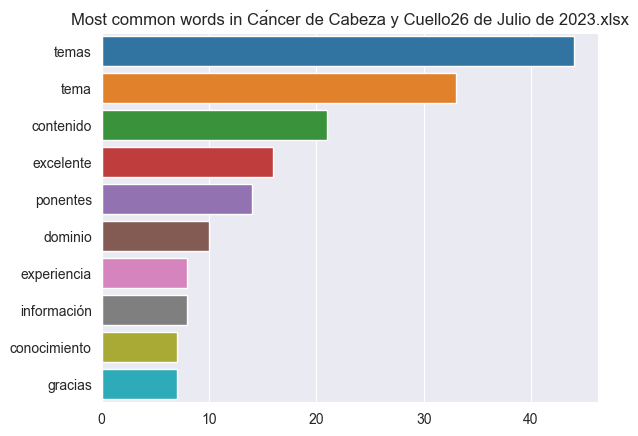

Most common words in Cáncer de estómago09 de Agosto de 2023.xlsx:
[('temas', 45), ('tema', 32), ('excelente', 22), ('contenido', 21), ('ponentes', 16), ('información', 14), ('organización', 12), ('experiencia', 12), ('dominio', 10), ('ponente', 10)]



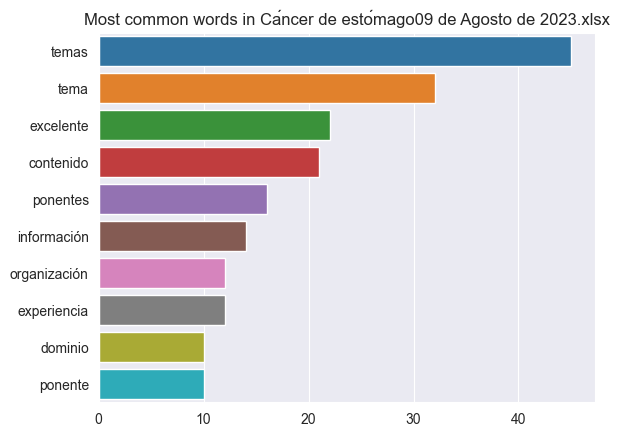

Most common words in ConversatorioInvestigación en Seguridad del Paciente03 de agosto de 2023.xlsx:
[('temas', 52), ('tema', 40), ('ponentes', 35), ('excelente', 22), ('contenido', 17), ('organización', 15), ('información', 12), ('horario', 10), ('dominio', 10), ('investigación', 7)]



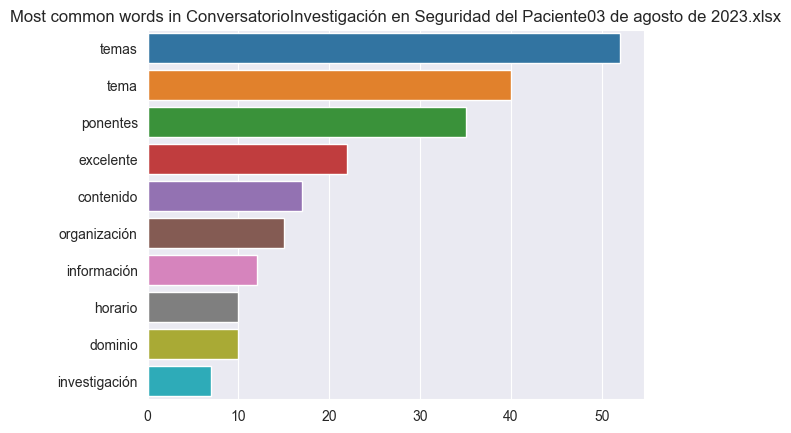

Most common words in Día Internacional del Sarcoma12 de Julio de 2023.xlsx:
[('temas', 36), ('tema', 32), ('contenido', 19), ('excelente', 18), ('ponentes', 13), ('organización', 9), ('información', 9), ('ponencia', 8), ('ponente', 7), ('dominio', 7)]



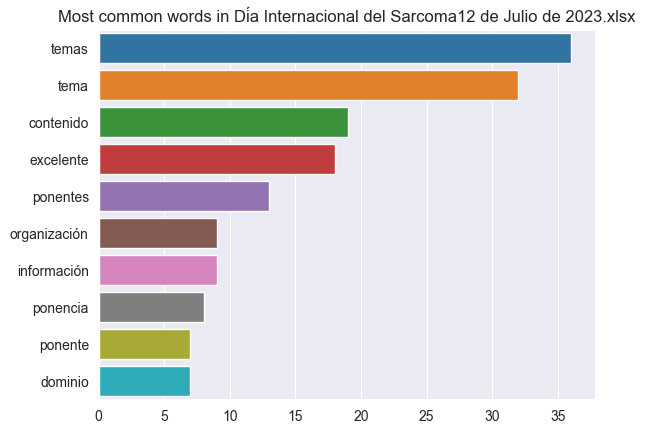

Most common words in Cáncer de Riñón23 de agosto de 2023.xlsx:
[('tema', 37), ('temas', 27), ('excelente', 21), ('ponentes', 16), ('contenido', 14), ('dominio', 14), ('información', 11), ('ponencia', 11), ('ponente', 9), ('gracias', 9)]



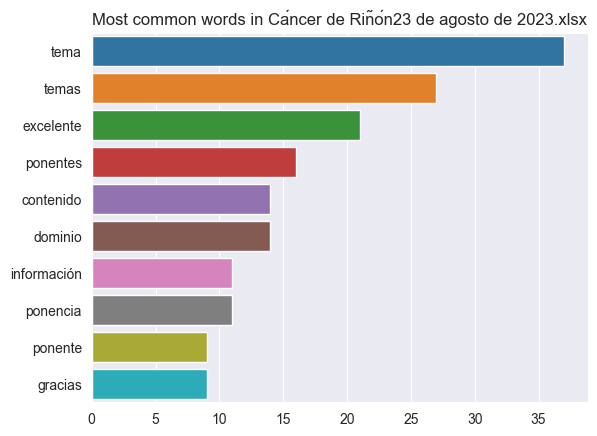

In [40]:
from collections import Counter

words_global = []

for i in range(len(data_from_files)):
    # Selecting Data
    liked = data_from_files[i].iloc[:,0]
    
    data_non_stop = []
    words = []

    for op in liked:
        op_l = op.lower()
        data_non_stop.append(remove_stop_words(op_l))

    for op in data_non_stop:
        op_splt = op.split()
        words.extend(op_splt)
        
    words_global.extend(words)
        
    words_counted = Counter(words)
    most_common = words_counted.most_common(10)
    print(f"Most common words in {names[i]}:")
    print(most_common)
    print()
    
    sns.barplot(y=[x[0] for x in most_common], x=[x[1] for x in most_common])
    plt.title(f"Most common words in {names[i]}")
    plt.show()

* Global

Most common words in Cáncer de Riñón23 de agosto de 2023.xlsx:
[('temas', 204), ('tema', 174), ('excelente', 99), ('ponentes', 94), ('contenido', 92), ('información', 54), ('dominio', 51), ('organización', 49), ('experiencia', 43), ('ponencia', 37)]



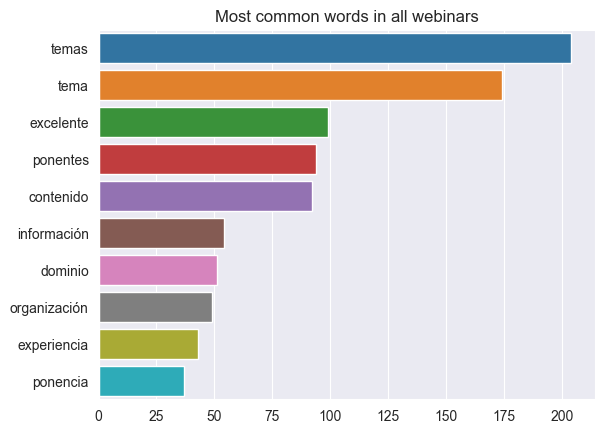

In [41]:
words_counted = Counter(words_global)
most_common = words_counted.most_common(10)
print(f"Most common words in {names[i]}:")
print(most_common)
print()

sns.barplot(y=[x[0] for x in most_common], x=[x[1] for x in most_common])
plt.title(f"Most common words in all webinars")
plt.show()

## NLP for the recommended topics for the next webinars

El análisis de tópicos, que es una técnica probabilística que asigna a cada texto una distribución de tópicos, y a cada tópico una distribución de palabras. Así, se pueden descubrir los temas más relevantes en un conjunto de textos, y clasificarlos según su pertenencia a uno o más tópicos. Existen varios modelos de análisis de tópicos, como el LDA (Latent Dirichlet Allocation), el PLSA (Probabilistic Latent Semantic Analysis) o el NMF (Non-negative Matrix Factorization).

### Data Cleaning

In [65]:
interests = [ i for j in range(len(data_from_files)) for i in data_from_files[j].iloc[:,1].dropna() ]
print(f'Total interests: {len(interests)}')

Total interests: 1161


Lower words

In [67]:
# Lower for better results
interests = [ i.lower() for i in interests ]

Spell checker

In [82]:
from spellchecker import SpellChecker
# Speller
spell = SpellChecker(language='es')

# Remover signos y caractéres especiales
interests_cleaned = [ str(i).replace("[^a-zA-ZáéíóúÁÉÍÓÚüÜñÑ]", " ") for i in interests]
# Strip white spaces
interests_cleaned = [ i.lower().strip() for i in interests_cleaned]

interests_cleaned_and_corrected = []
# Correct spelling
for inter in interests_cleaned:
    words = inter.split()
    corrected_words = []
    for word in words:
        corrected_word = spell.correction(word)
        if word == 'covid' or word == 'onco':
            corrected_words.append(word)
            continue
        if word == 'obtetricas':
            corrected_words.append('obstétricas')
            continue
        if corrected_word != None:
            corrected_words.append(corrected_word)
        else:
            corrected_words.append(word)
    corrected_text = ' '.join(corrected_words)
    interests_cleaned_and_corrected.append(corrected_text)

Remove stop words and words with less than 3 characters

In [86]:
# Removing stop words
non_stop_words = []
for inter in interests_cleaned_and_corrected:
    non_stop_words.append(remove_stop_words(inter))

### Latent Semantic Analysis (LSA) for new topics

El análisis semántico latente (LSA, por las siglas en ingles de Latent Semantic Analysis) es un modelo estadístico que se utiliza para **determinar las relaciones** entre una colección de documentos y los términos presentes en estos *n* documentos a  partir de obtener las relaciones semánticas entre las palabras.

In [ ]:
#Pre-procesamiento de los documentos
pre_data = pd.DataFrame({'interests':interests, 'interests_cleaned':interests_cleaned, 'interests_cleaned_and_corrected':interests_cleaned_and_corrected})
pre_data

,interests,interests_cleaned,interests_cleaned_and_corrected
0,Cáncer de mama,cáncer de mama,cáncer de mama
1,Todo lo que tenga que ver con cuestiones quirú...,todo lo que tenga que ver con cuestiones quirú...,todo lo que tenga que ver con cuestiones quirú...
2,UCI,uci,uci
3,Onco Genetica,onco genetica,once genetica
4,CA cérvicouterino,ca cérvicouterino,ca cérvicouterino
...,...,...,...
1157,Cáncer de piel,cáncer de piel,cáncer de piel
1158,Atonía uterina,atonía uterina,agonía uterina
1159,trauma abdominal,trauma abdominal,trauma abdominal
1160,Atención integral a pacientes transgénero,atención integral a pacientes transgénero,atención integral a pacientes transgénero


In [ ]:
datos = pre_data['interests_cleaned_and_corrected'].tolist()
non_stop_words = []
for inter in datos:
    non_stop_words.append(remove_stop_words(inter))
pre_data['non_stop_words'] = non_stop_words

In [ ]:
pre_data

,interests,interests_cleaned,interests_cleaned_and_corrected,non_stop_words
0,Cáncer de mama,cáncer de mama,cáncer de mama,cáncer mama
1,Todo lo que tenga que ver con cuestiones quirú...,todo lo que tenga que ver con cuestiones quirú...,todo lo que tenga que ver con cuestiones quirú...,cuestiones quirúrgicas técnicas actual mejora ...
2,UCI,uci,uci,uci
3,Onco Genetica,onco genetica,once genetica,genetica
4,CA cérvicouterino,ca cérvicouterino,ca cérvicouterino,ca cérvicouterino
...,...,...,...,...
1157,Cáncer de piel,cáncer de piel,cáncer de piel,cáncer piel
1158,Atonía uterina,atonía uterina,agonía uterina,agonía uterina
1159,trauma abdominal,trauma abdominal,trauma abdominal,trauma abdominal
1160,Atención integral a pacientes transgénero,atención integral a pacientes transgénero,atención integral a pacientes transgénero,atención integral pacientes transgénero


* Creamos una matriz de documentos y términos usando TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
                            max_features= 1000, # maximum number of words
                            max_df = 0.95,
                            min_df=2,
                            smooth_idf=True)

X = vectorizer.fit_transform(pre_data['non_stop_words'])
print("Tamaño de la matriz TD-IDF: ", X.shape)

Tamaño de la matriz TD-IDF:  (1162, 339)


In [ ]:
## Visualization of the terms
terminos = vectorizer.get_feature_names_out()
print("Total de términos:", len(terminos))

Total de términos: 339


* Análisis de la versión truncada de SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=10, #Dimensionalidad deseada de los datos de salida.
                         algorithm='randomized',
                         n_iter=100, random_state=122)
svd_model.fit_transform(X)

array([[ 6.53575640e-01, -8.06173262e-03, -9.46286054e-04, ...,
         3.56272662e-04,  5.67176003e-03,  3.75504506e-03],
       [ 2.49912433e-03,  5.57407304e-03,  1.08088355e-02, ...,
         2.54583098e-03, -3.05604524e-03,  1.28867859e-03],
       [ 2.26828211e-06,  1.19803558e-04,  3.63789287e-04, ...,
         3.79039696e-03,  1.09301234e-03, -3.25193675e-03],
       ...,
       [ 4.93494284e-05,  6.04598648e-04,  1.02621120e-03, ...,
         3.01134731e-03,  1.19004401e-01, -1.35528522e-02],
       [ 7.98817341e-04,  5.81471218e-02,  6.62249834e-02, ...,
         4.21034163e-02,  2.29113149e-04, -3.33651625e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
print("-- Analizando el tamaño de las matrices ---")
print("Sigma: ",svd_model.singular_values_.shape)
print("VT: ",svd_model.components_.shape)

-- Analizando el tamaño de las matrices ---
Sigma:  (10,)
VT:  (10, 339)


In [ ]:
#Analizando las profundidades de model.components_
for topic_idx, topic in enumerate(svd_model.components_):
  print("Número de tópico:",topic_idx)
  print("topic:", len(topic))

Número de tópico: 0
topic: 339
Número de tópico: 1
topic: 339
Número de tópico: 2
topic: 339
Número de tópico: 3
topic: 339
Número de tópico: 4
topic: 339
Número de tópico: 5
topic: 339
Número de tópico: 6
topic: 339
Número de tópico: 7
topic: 339
Número de tópico: 8
topic: 339
Número de tópico: 9
topic: 339


In [ ]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(5, 4, figsize=(30, 15), sharex=True)
    axes = axes.flatten()

    if title == "TruncatedSVD":
      model = model.components_ # components_ es la matriz VT
    else:
      model = model
    for topic_idx, topic in enumerate(model):

        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1] #Returns the indices that sort a tensor along a given dimension in ascending order by value.
        #print("top_features_ind:",top_features_ind)

        top_features = [feature_names[i] for i in top_features_ind] #devuelve la palabra basada en el índice
        #print("top_features:",top_features)

        weights = topic[top_features_ind]
        #print("weights:",len(weights))

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        #ax.set_title(f"Topico: {dataset.target_names[topic_idx]} ", fontdict={"fontsize": 20}) #{topic_idx +1}
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=10)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.70, hspace=0.3)

--- Visualizando tópicos con TruncatedSVD ---


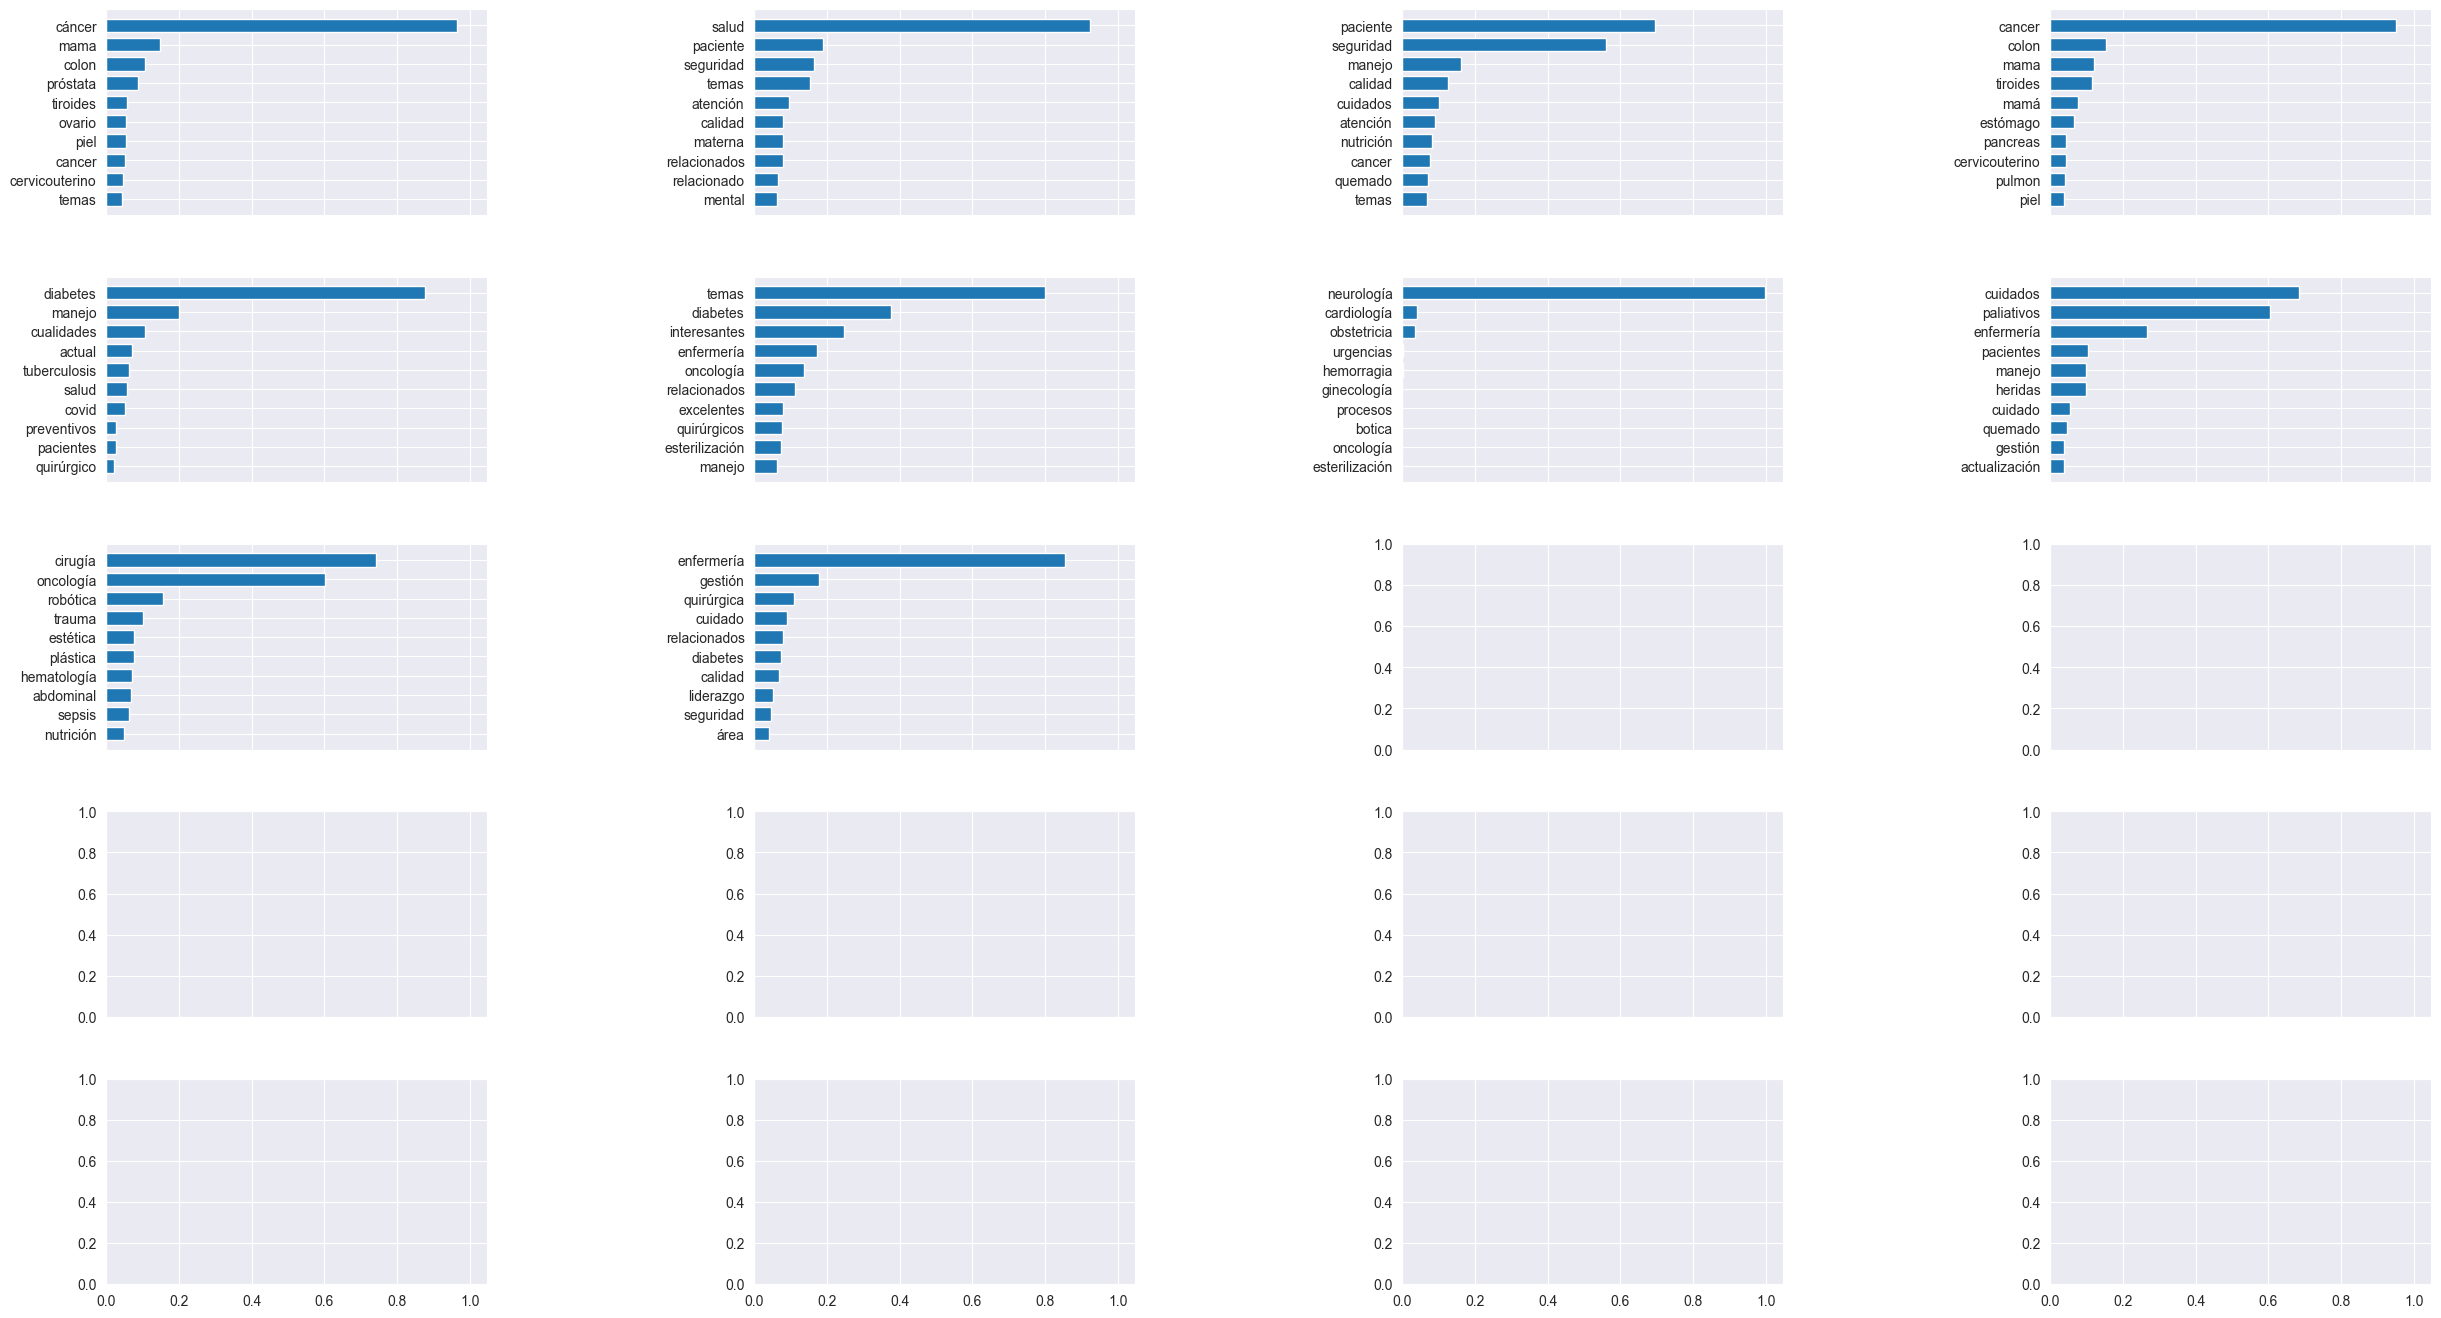

In [ ]:
print("--- Visualizando tópicos con TruncatedSVD ---")
plot_top_words(svd_model, terminos, 10, "TruncatedSVD")